In [113]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sqlalchemy import create_engine
from urllib.parse import quote_plus

In [114]:
#connect to SQLAlchemy
engine = create_engine("postgresql://postgres:%s@localhost/energy_consumption" % quote_plus("PW"))
engine.connect()

In [115]:
df_housing = pd.read_sql_table('housing_characteristics', engine)
df_housing.head()

,doeid,typehuq,yearmaderange,totrooms,walltype,rooftype,adqinsul,numfrig,equipm,acequipm_pub,totsqft_en,totalbtu,totaldol
0,100001,2,4,8,1,5,2,2,3,1,2100,144647.71,2656.89
1,100002,5,5,3,1,-2,2,1,3,1,590,28034.61,975.00
2,100003,5,3,4,1,-2,2,0,2,1,900,30749.71,522.65
3,100004,2,5,9,3,5,2,2,3,1,2100,86765.19,2061.77
4,100005,5,3,3,7,-2,2,2,3,1,800,59126.93,1463.04


In [116]:
#Read housing_characteristics csv file in the Table_CSVs folder
#df_housing = pd.read_csv("Table_CSVs/housing_characteristics.csv")

#drop missing values
df_housing.dropna(inplace=True)

#drop unnecessary 
df_housing.drop(columns=["doeid", 'totaldol'], inplace=True)

#review dataframe
df_housing.head(20)

,typehuq,yearmaderange,totrooms,walltype,rooftype,adqinsul,numfrig,equipm,acequipm_pub,totsqft_en,totalbtu
0,2,4,8,1,5,2,2,3,1,2100,144647.71
1,5,5,3,1,-2,2,1,3,1,590,28034.61
2,5,3,4,1,-2,2,0,2,1,900,30749.71
3,2,5,9,3,5,2,2,3,1,2100,86765.19
4,5,3,3,7,-2,2,2,3,1,800,59126.93
5,2,6,8,1,5,1,2,3,1,4520,85400.64
6,2,2,5,1,5,3,1,3,1,2100,131875.03
7,5,7,4,3,-2,2,1,4,-2,900,41446.59
8,5,7,3,7,-2,2,1,5,4,750,14512.02
9,5,5,4,4,-2,2,1,4,1,760,12393.76


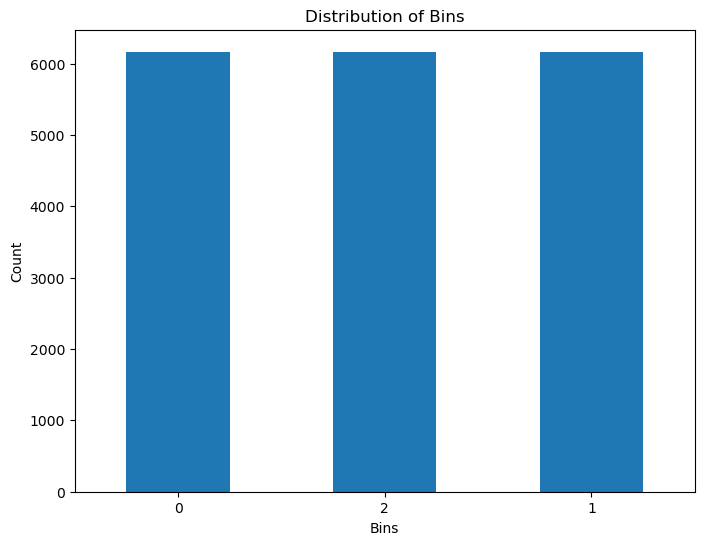

Counts of samples in each bin:
btubin
0    6166
2    6165
1    6165
Name: count, dtype: int64


In [117]:
# Specify the number of bins
num_bins = 3

# Perform equal-frequency binning
df_housing['btubin'] = pd.qcut(df_housing['totalbtu'], q=num_bins, labels=False)

#Check the balance of bins
bin_counts = df_housing['btubin'].value_counts()

# Plot the distribution of bins
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Bins')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.show()

# Display the counts of samples in each bin
print("Counts of samples in each bin:")
print(bin_counts) 

In [118]:
#display df
df_housing.head(20)

,typehuq,yearmaderange,totrooms,walltype,rooftype,adqinsul,numfrig,equipm,acequipm_pub,totsqft_en,totalbtu,btubin
0,2,4,8,1,5,2,2,3,1,2100,144647.71,2
1,5,5,3,1,-2,2,1,3,1,590,28034.61,0
2,5,3,4,1,-2,2,0,2,1,900,30749.71,0
3,2,5,9,3,5,2,2,3,1,2100,86765.19,1
4,5,3,3,7,-2,2,2,3,1,800,59126.93,1
5,2,6,8,1,5,1,2,3,1,4520,85400.64,1
6,2,2,5,1,5,3,1,3,1,2100,131875.03,2
7,5,7,4,3,-2,2,1,4,-2,900,41446.59,0
8,5,7,3,7,-2,2,1,5,4,750,14512.02,0
9,5,5,4,4,-2,2,1,4,1,760,12393.76,0


Logistic Regression

In [119]:
#import modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [120]:
#Split data into features and target variables
X = df_housing.drop(['totalbtu', 'btubin'], axis=1)
y = df_housing['btubin']

In [121]:
#Split the data into training and testing datasets by using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
#initiate the model
LogR_Model = LogisticRegression(max_iter=1000)

#fit the model
LogR_Model.fit(X_train, y_train)

c:\Users\ssays\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [123]:
#initiate the model
LogR_Model = LogisticRegression(solver='saga', max_iter=1000)

#fit the model
LogR_Model.fit(X_train, y_train)

c:\Users\ssays\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [124]:
#initiate the model
LogR_Model = LogisticRegression(solver='saga', max_iter=1000, penalty='l2')

#fit the model
LogR_Model.fit(X_train, y_train)

c:\Users\ssays\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [125]:
#initiate the model
LogR_Model = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2')

#fit the model
LogR_Model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [126]:
#emake a prediction
y_pred = LogR_Model.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5789189189189189
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1232
           1       0.47      0.35      0.40      1266
           2       0.59      0.74      0.66      1202

    accuracy                           0.58      3700
   macro avg       0.57      0.58      0.57      3700
weighted avg       0.57      0.58      0.57      3700

Confusion Matrix:
[[806 290 136]
 [343 446 477]
 [ 90 222 890]]


Random Forest Classification

In [127]:
#import modules
from sklearn.ensemble import RandomForestClassifier

In [128]:
#train model
RFC_model = RandomForestClassifier(n_estimators=100, random_state=42)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
#predict
y_pred =RFC_model.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6143243243243244
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1232
           1       0.50      0.45      0.47      1266
           2       0.65      0.69      0.67      1202

    accuracy                           0.61      3700
   macro avg       0.61      0.62      0.61      3700
weighted avg       0.61      0.61      0.61      3700

Confusion Matrix:
[[873 272  87]
 [328 572 366]
 [ 64 310 828]]


Optimize Random Forest Classifier

In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(estimator=RFC_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Parameters:", best_params_random)
print("Best Score:", best_score_random)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_depth': 10}
Best Score: 0.6416600065763636


In [131]:
#optimize
RFC_optimized_model = RandomForestClassifier(n_estimators=400, min_samples_split=10, min_samples_leaf=6, max_features='sqrt', max_depth=10, random_state=42)
RFC_optimized_model.fit(X_train, y_train)

#evaluate
y_pred =RFC_optimized_model.predict(X_test)
opt_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", opt_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.635945945945946
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1232
           1       0.51      0.49      0.50      1266
           2       0.66      0.72      0.69      1202

    accuracy                           0.64      3700
   macro avg       0.64      0.64      0.64      3700
weighted avg       0.63      0.64      0.63      3700

Confusion Matrix:
[[866 290  76]
 [287 616 363]
 [ 37 294 871]]


In [132]:
from sklearn.model_selection import GridSearchCV

#Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=RFC_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.6420654804855548


In [133]:
#optimize
RFC_optimized_model = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=10, random_state=42)
RFC_optimized_model.fit(X_train, y_train)

#evaluate
y_pred =RFC_optimized_model.predict(X_test)
opt_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", opt_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6424324324324324
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1232
           1       0.52      0.49      0.51      1266
           2       0.67      0.73      0.70      1202

    accuracy                           0.64      3700
   macro avg       0.64      0.64      0.64      3700
weighted avg       0.64      0.64      0.64      3700

Confusion Matrix:
[[871 284  77]
 [290 623 353]
 [ 33 286 883]]


Gradient Boost Classifier

In [134]:
#import modules
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
#initiate model
GBC_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#train model
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [136]:
#make a prediction
y_pred = GBC_model.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1232
           1       0.52      0.47      0.49      1266
           2       0.67      0.74      0.70      1202

    accuracy                           0.64      3700
   macro avg       0.64      0.64      0.64      3700
weighted avg       0.64      0.64      0.64      3700

Confusion Matrix:
[[885 280  67]
 [296 596 374]
 [ 40 275 887]]


Feedforward Neural Network

In [137]:
#import modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [138]:
#define model
nn_model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

#compile model
nn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#convert target variable to numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

#encode data
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_encoded = to_categorical(y_val_encoded, num_classes=num_classes)

#train model
history = nn_model.fit(X_train, y_train_encoded, epochs=50, validation_data=(X_val, y_val_encoded))

Epoch 1/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3875 - loss: 19.0765 - val_accuracy: 0.4668 - val_loss: 1.4475
Epoch 2/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4648 - loss: 2.4054 - val_accuracy: 0.5335 - val_loss: 2.6055
Epoch 3/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4812 - loss: 2.3508 - val_accuracy: 0.4611 - val_loss: 1.1911
Epoch 4/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4736 - loss: 2.2735 - val_accuracy: 0.4951 - val_loss: 2.3410
Epoch 5/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4829 - loss: 2.3250 - val_accuracy: 0.3327 - val_loss: 3.7878
Epoch 6/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4949 - loss: 2.0689 - val_accuracy: 0.4386 - val_loss: 4.8129
Epoch 7/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4888 - loss: 2.2464 - val_accuracy: 0.4614 - val_loss: 1.7997
Epoch 8/50
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4901 - loss: 1.9968 - val_accuracy: 0

Optimize Neural Network

In [139]:
#import modules
from tensorflow.keras.callbacks import EarlyStopping


#define model
onn_model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

#compile model
onn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


#convert target variable to numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

#encode data
y_train_encoded = to_categorical(y_train_encoded, num_classes=3)
y_val_encoded = to_categorical(y_val_encoded, num_classes=3)

#train model
history = nn_model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping])



Epoch 1/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5468 - loss: 0.9644 - val_accuracy: 0.5903 - val_loss: 0.8482
Epoch 2/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5567 - loss: 0.9402 - val_accuracy: 0.5773 - val_loss: 0.9227
Epoch 3/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5584 - loss: 0.9485 - val_accuracy: 0.5646 - val_loss: 0.9323
Epoch 4/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5524 - loss: 0.9818 - val_accuracy: 0.5727 - val_loss: 0.8695
Epoch 5/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5577 - loss: 0.9224 - val_accuracy: 0.5441 - val_loss: 0.9369
Epoch 6/100
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5645 - loss: 0.9191 - val_accuracy: 0.5614 - val_loss: 0.9586
Epoch 6: early stopping
